In [10]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

# 데이터 전처리
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# 첫 번째 모델
input_dim = x_train.shape[1:]
encoder_input = keras.Input(shape=input_dim)
x = layers.Flatten()(encoder_input)
encoder_output = layers.Dense(64, activation="relu")(x)
x = layers.Dense(np.prod(input_dim), activation="sigmoid")(encoder_output)
decoder_output = layers.Reshape(input_dim)(x)
autoencoder1 = keras.Model(encoder_input, decoder_output)
autoencoder1.summary()

# 두 번째 모델
encoder_input = keras.Input(shape=input_dim)
x = layers.Flatten()(encoder_input)
encoder_output = layers.Dense(128, activation="relu")(x)
x = layers.Dense(64, activation="relu")(encoder_output)
x = layers.Dense(128, activation="relu")(x)
x = layers.Dense(np.prod(input_dim), activation="sigmoid")(x)
decoder_output = layers.Reshape(input_dim)(x)
autoencoder2 = keras.Model(encoder_input, decoder_output)
autoencoder2.summary()

# 모델 컴파일
autoencoder1.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
autoencoder2.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])

# 모델 학습
batch_size = 64
epochs = 30

history1 = autoencoder1.fit(
    x_train, x_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1, 
    validation_data=(x_test, x_test)
)

history2 = autoencoder2.fit(
    x_train, x_train, 
    batch_size=batch_size, 
    epochs=epochs, 
    verbose=1, 
    validation_data=(x_test, x_test)
)

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 28, 28)]          0         
                                                                 
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 64)                50240     
                                                                 
 dense_37 (Dense)            (None, 784)               50960     
                                                                 
 reshape_4 (Reshape)         (None, 28, 28)            0         
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________
Model: "model_10"
___________________________________

KeyboardInterrupt: ignored

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

input_shape = (28*28,)

#첫 번째 모델
input1 = layers.Input(input_shape)
encoder1 = layers.Dense(500, activation='relu')(input1)
encoder2 = layers.Dense(300, activation='relu')(encoder1)
encoder3 = layers.Dense(100, activation='relu')(encoder2)

decoder1 = layers.Dense(300, activation='relu')(encoder3)
decoder2 = layers.Dense(500, activation='relu')(decoder1)
output1 = layers.Dense(28*28, activation='relu')(decoder2)

autoencoder1 = keras.models.Model(input1, output1)
autoencoder1.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
autoencoder1.summary()

#두 번째 모델
input2 = layers.Input(input_shape)
encoder1 = layers.Dense(256, activation='relu')(input2)
encoder2 = layers.Dense(128, activation='relu')(encoder1)
encoder3 = layers.Dense(64, activation='relu')(encoder2)

decoder1 = layers.Dense(128, activation='relu')(encoder3)
decoder2 = layers.Dense(256, activation='relu')(decoder1)
output2 = layers.Dense(28*28, activation='relu')(decoder2)

autoencoder2 = keras.models.Model(input2, output2)
autoencoder2.compile(optimizer='Adam', loss='mean_squared_error', metrics=['mean_squared_error'])
autoencoder2.summary()

batch_size = 64
epochs = 30

history1 = autoencoder1.fit(
x_train, x_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, x_test)
)

history2 = autoencoder2.fit(
x_train, x_train,
batch_size=batch_size,
epochs=epochs,
verbose=1,
validation_data=(x_test, x_test)
)

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_24 (Dense)            (None, 500)               392500    
                                                                 
 dense_25 (Dense)            (None, 300)               150300    
                                                                 
 dense_26 (Dense)            (None, 100)               30100     
                                                                 
 dense_27 (Dense)            (None, 300)               30300     
                                                                 
 dense_28 (Dense)            (None, 500)               150500    
                                                                 
 dense_29 (Dense)            (None, 784)               3927

ValueError: ignored

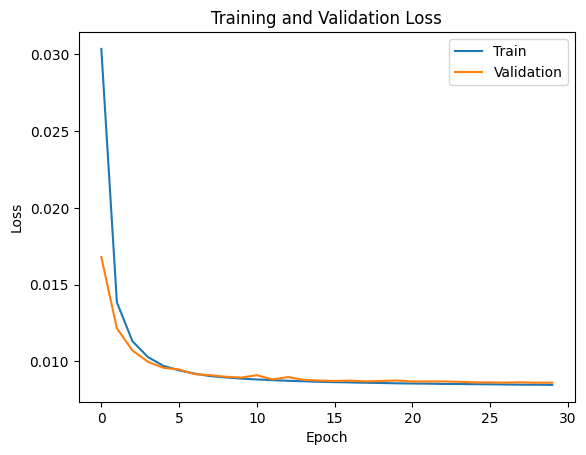

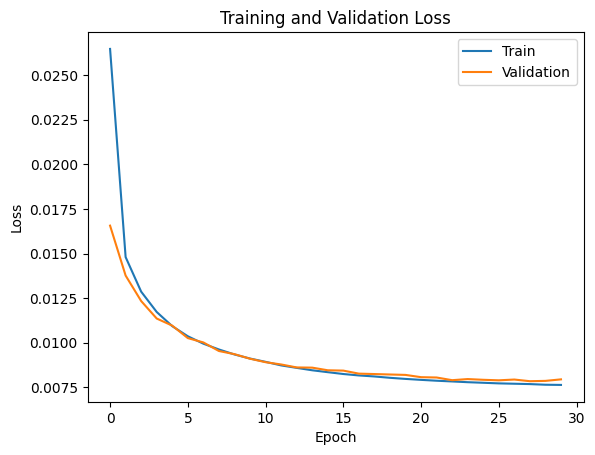

In [4]:
# 학습/검증 손실 출력
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

1/1 [==============================] - 0s 22ms/step


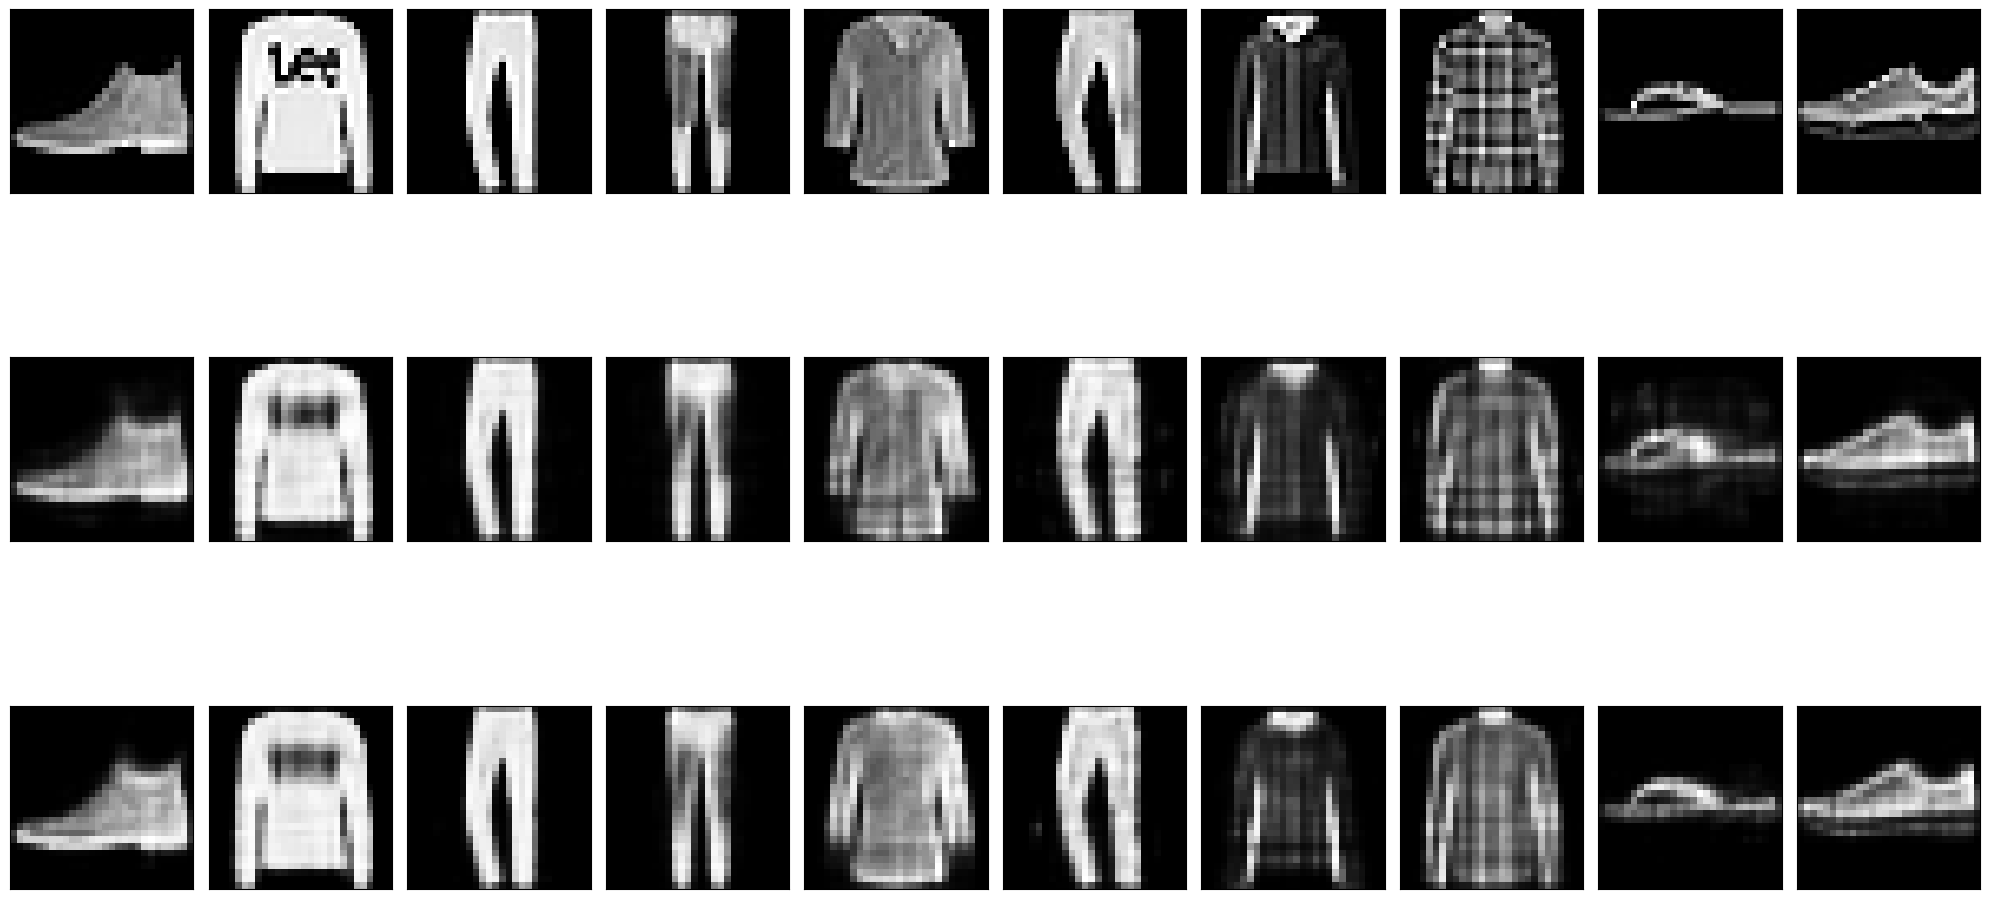

In [7]:
num_examples = 10
decoded1 = autoencoder1.predict(x_test[:num_examples])
decoded2 = autoencoder2.predict(x_test[:num_examples])

plt.figure(figsize=(20, 12))
for i in range(num_examples):
    # 원본 이미지
    ax = plt.subplot(3, num_examples, i + 1)
    plt.imshow(x_test[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 생성된 이미지 (첫 번째 모델)
    ax = plt.subplot(3, num_examples, i + 1 + num_examples)
    plt.imshow(decoded1[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # 생성된 이미지 (두 번째 모델)
    ax = plt.subplot(3, num_examples, i + 1 + (2 * num_examples))
    plt.imshow(decoded2[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.tight_layout()
plt.show()


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar100
import matplotlib.pyplot as plt

# CIFAR-100 데이터셋 로드
(x_train, _), (x_test, _) = cifar100.load_data()

# 데이터 전처리
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 모델 생성
input_shape = (32, 32, 3)
encoding_dim = 128

# 인코더 모델
encoder_input = keras.Input(shape=input_shape)
encoder = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(encoder_input)
encoder = layers.MaxPooling2D((2, 2), padding='same')(encoder)
encoder = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
encoder = layers.MaxPooling2D((2, 2), padding='same')(encoder)
encoder = layers.Conv2D(encoding_dim, (3, 3), activation='relu', padding='same')(encoder)

# 디코더 모델
decoder = layers.Conv2D(128, (3, 3), activation='relu', padding='same')(encoder)
decoder = layers.UpSampling2D((2, 2))(decoder)
decoder = layers.Conv2D(64, (3, 3), activation='relu', padding='same')(decoder)
decoder = layers.UpSampling2D((2, 2))(decoder)
decoder = layers.Conv2D(3, (3, 3), activation='sigmoid', padding='same')(decoder)

# 오토인코더 모델
autoencoder = keras.Model(encoder_input, decoder)

# 모델 컴파일
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# 모델 요약
autoencoder.summary()

# 모델 학습
history = autoencoder.fit(x_train, x_train, epochs=10, batch_size=128, validation_split=0.2)

# 훈련 및 검증 손실 출력
print("Train Loss:", history.history['loss'][-1])
print("Validation Loss:", history.history['val_loss'][-1])

# 원본 및 생성된 데이터 출력
encoded_data = autoencoder.predict(x_test)

print("Original Data:")
print(x_test[0])  # 첫 번째 이미지 출력

print("Generated Data:")
print(encoded_data[0])  # 첫 번째 이미지 출력

# 원본 이미지와 생성된 이미지 시각화
fig, axes = plt.subplots(1, 2)
axes[0].imshow(x_test[0])
axes[0].set_title('Original')
axes[1].imshow(encoded_data[0])
axes[1].set_title('Generated')
plt.show()


 58908672/169001437 [=========>....................] - ETA: 4s

KeyboardInterrupt: ignored